<a href="https://colab.research.google.com/github/Vignesh424/Audi_Pred/blob/main/Stock_Price_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [314]:
!pip install mplfinance

In [315]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
import mplfinance as mpf
from sklearn.model_selection import train_test_split

In [316]:
data = pd.read_csv('/content/SNAP.csv', parse_dates=True)

In [317]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Variance,X and O
0,26-11-2018,6.27,6.52,6.24,6.50,6.50,10384500,10384500,O
1,27-11-2018,6.47,6.53,6.31,6.40,6.40,12720100,2335600,O
2,28-11-2018,6.49,6.54,6.27,6.51,6.51,10049300,-2670800,X
3,29-11-2018,6.47,6.54,6.33,6.40,6.40,9346700,-702600,X
4,30-11-2018,6.40,6.54,6.31,6.51,6.51,10397800,1051100,O


In [318]:
data2 = data.drop(columns=['Variance','X and O'], axis=1)
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,26-11-2018,6.27,6.52,6.24,6.50,6.50,10384500
1,27-11-2018,6.47,6.53,6.31,6.40,6.40,12720100
2,28-11-2018,6.49,6.54,6.27,6.51,6.51,10049300
3,29-11-2018,6.47,6.54,6.33,6.40,6.40,9346700
4,30-11-2018,6.40,6.54,6.31,6.51,6.51,10397800


In [319]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [320]:
data2.shape

(251, 7)

In [321]:
data2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,12.006853,12.265884,11.750554,12.016733,12.016733,2.684489e+07
std,3.677856,3.721066,3.598686,3.650503,3.650503,1.869312e+07
min,4.960000,5.140000,4.820000,4.990000,4.990000,8.303600e+06
25%,9.850000,9.982500,9.530000,9.800000,9.800000,1.642425e+07
50%,11.990000,12.370000,11.790000,11.990000,11.990000,2.147380e+07
75%,15.035000,15.274000,14.640000,15.010000,15.010000,2.967325e+07
max,18.010000,18.360001,17.620001,17.889999,17.889999,1.485680e+08


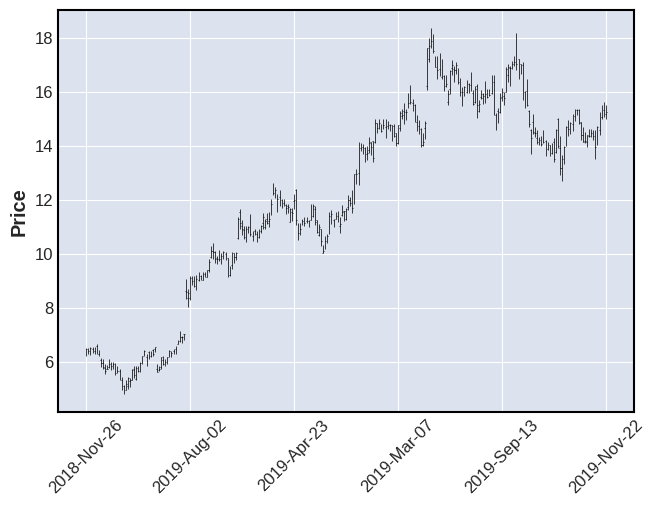

In [322]:
#Visualize the stocks
data2 = data2.set_index(pd.DatetimeIndex(data2['Date'].values))
mpf.plot(data2)

In [323]:
#Label Encoder needed for Date
le = LabelEncoder()
data2['Date']= le.fit_transform(data2['Date'])

In [324]:
#Drop the Volume
X = data2.drop('Volume', axis=1)
Y = data2['Volume']

In [325]:
#Train and Test Splitting
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3,random_state=50)

In [326]:
#RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X,Y)

RandomForestRegressor()

In [327]:
#Predictions
Y_Pred = rfr.predict(X_test)

In [328]:
#Check the Accuracy on Training
rfr.score(X_train, Y_train)

0.8973280791534717

In [329]:
#Check the Accuracy on Testing
rfr.score(X_test,Y_test)

0.8913190145232703

<ipython-input-330-35315fe24b43>:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  predicted_data['Date'] = pd.to_datetime(predicted_data['Date'])


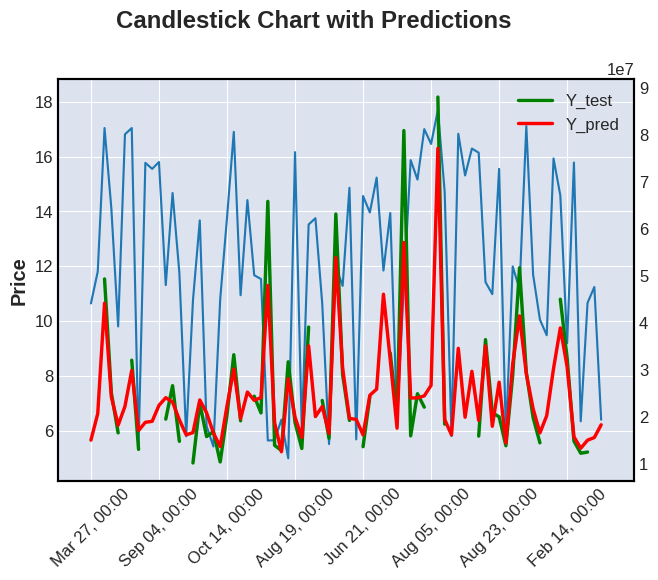

In [330]:
#Predictions
#Predictions
import mplfinance as mpf
import pandas as pd

# Assuming you have data2, Y_test, and Y_pred from your previous code

# 1. Create a new DataFrame with the same index as Y_test
predicted_data = data2.loc[Y_test.index, ['Date', 'Open', 'High', 'Low', 'Close']].copy()

# 2. Convert 'Date' back to datetime
predicted_data['Date'] = le.inverse_transform(predicted_data['Date'])
predicted_data['Date'] = pd.to_datetime(predicted_data['Date'])
predicted_data = predicted_data.set_index('Date')

# 3. Add predicted values to the DataFrame
predicted_data['Y_test'] = Y_test
predicted_data['Y_pred'] = Y_Pred

# 4. Plot the candlestick chart with predictions
apds = [
    mpf.make_addplot(predicted_data['Y_test'], color='g', label='Y_test'),
    mpf.make_addplot(predicted_data['Y_pred'], color='r', label='Y_pred')
]

mpf.plot(predicted_data, type='line', title='Candlestick Chart with Predictions', addplot=apds)